In [131]:
import sqlalchemy as sa
import pandas as pd
engine = sa.create_engine('mysql+mysqldb://root:@173.194.227.84/weather')
#pd.read_sql(sa.text('SELECT * FROM weather where Col_1=:col1'), engine, params={'col1': 'X'})
df=pd.read_sql(sa.text('SELECT * FROM weather order by time desc limit 180000;'), engine)
df.set_index('time',inplace='True')

In [132]:
from datetime import datetime, timedelta
#final time
tf=df.index[0]
#init time
ti=tf-timedelta(days=10)
print "Considering a period from {} to {}".format(ti,tf)

Considering a period from 2016-06-27 14:55:57 to 2016-07-07 14:55:57


In [133]:
df2=df[df.index>ti].resample('600s').interpolate().resample('3600s')
print "The shape of dataframe {}".format(df2.shape)

The shape of dataframe (241, 3)


In [134]:
df2.as_matrix(columns=['temp','humi','israin'])

array([[  3.28000000e+01,   6.00450000e+01,   0.00000000e+00],
       [  3.20447973e+01,   6.30496998e+01,   0.00000000e+00],
       [  3.11824739e+01,   6.71289213e+01,   0.00000000e+00],
       [  3.04079798e+01,   7.05359960e+01,   0.00000000e+00],
       [  2.96602407e+01,   7.45173801e+01,   0.00000000e+00],
       [  2.78274343e+01,   7.95034921e+01,   0.00000000e+00],
       [  2.57797826e+01,   8.97242029e+01,   0.00000000e+00],
       [  2.57793249e+01,   9.14250616e+01,   1.45833333e-01],
       [  2.57438819e+01,   9.24676802e+01,   3.95833333e-01],
       [  2.57084388e+01,   9.35102988e+01,   6.45833333e-01],
       [  2.56729958e+01,   9.45529174e+01,   8.95833333e-01],
       [  2.55194000e+01,   9.54669613e+01,   9.99389499e-01],
       [  2.55354367e+01,   9.53923166e+01,   9.93284493e-01],
       [  2.55655723e+01,   9.53191620e+01,   9.85958486e-01],
       [  2.55957078e+01,   9.52460074e+01,   9.78632479e-01],
       [  2.56258433e+01,   9.51728528e+01,   9.7130647

(0, 105)

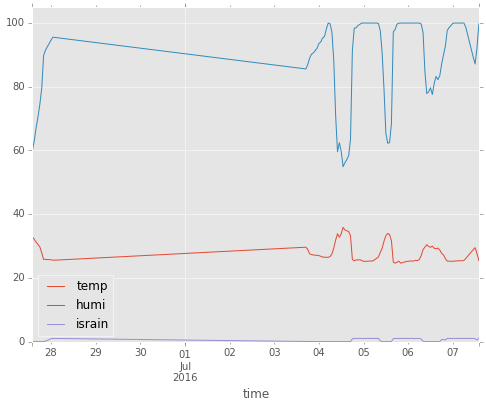

In [135]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
ax=df2.plot()
ax.set_ylim([0, 105])

In [136]:
def getProb(_df,conditions):
    p=[]
    for c in conditions:
        period=c['period']
        criteria=c['criteria']
        nmeet=df2.iloc[-period:].query(criteria).shape[1]
        p.append(100.0*float(nmeet)/period)
    return p

In [144]:
diseases=[
    {
        'Eng':'Brow Spot', 
        'Thai': 'ใบจุดสีน้ำตาล', 
        'conditions': [
            {'period':48,'criteria': '25<temp and temp<=30 and 70<humi and humi<=75 and israin==0'},
            {'period':36,'criteria': '25<temp and temp<=30 and 70<humi and humi<=75 and israin==1'},
            {'period':36,'criteria': '25<temp and temp<=30 and 76<humi and humi<=85 and israin==0'},
            {'period':30,'criteria': '25<temp and temp<=30 and 76<humi and humi<=85 and israin==1'},
            ]
    },
    {
        'Eng':'Blast', 
        'Thai': 'ไหม้', 
        'conditions': [
            {'period':60,'criteria': '22<temp and temp<=30 and 80<humi and humi<=84 and israin==0'},
            {'period':48,'criteria': '22<temp and temp<=30 and 80<humi and humi<=84 and israin==1'},
            ]
    },
    {
        'Eng':'Bacterial Leaf Streak', 
        'Thai': 'ใบขีดโปร่งแสง', 
        'conditions': [
            {'period':240,'criteria': '25<temp and temp<=34 and 85<humi and humi<=95 and israin==0'},
            {'period':192,'criteria': '25<temp and temp<=34 and 85<humi and humi<=95 and israin==1'},
            ]
    },
    {
        'Eng':'Dirty Panicle', 
        'Thai': 'เมล็ดด่าง', 
        'conditions': [
            {'period':120,'criteria': '25<temp and temp<=30 and 70<humi and humi<=75 and israin==0'},
            {'period':100,'criteria': '25<temp and temp<=30 and 70<humi and humi<=75 and israin==1'},
            {'period':100,'criteria': '25<temp and temp<=30 and 76<humi and humi<=95 and israin==0'},
            {'period':98,'criteria': '25<temp and temp<=30 and 76<humi and humi<=95 and israin==1'},
            ]
    },
    {
        'Eng':'Bacterial Leaf Blight', 
        'Thai': 'ขอบใบแห้ง', 
        'conditions': [
            {'period':96,'criteria': '25<temp and temp<=30 and 80<humi and humi<=84 and israin==0'},
            {'period':72,'criteria': '25<temp and temp<=30 and 80<humi and humi<=84 and israin==1'},
            ]
    },
]


In [168]:
import json
out=[]
outstr=""
for i in diseases:
    P=max(getProb(df2,i['conditions']))
    out.append({
            'Eng':i['Eng'],
            'Thai':i['Thai'],
            'P': P
        })
    outstr+="%5.1f%% %s<br>"%( P , i['Eng'])

outjs=json.dumps(out, ensure_ascii=False, sort_keys=True)
#to read json.loads(outjs)

In [169]:
print outjs

[{"Eng": "Brow Spot", "P": 10.0, "Thai": "ใบจุดสีน้ำตาล"}, {"Eng": "Blast", "P": 6.25, "Thai": "ไหม้"}, {"Eng": "Bacterial Leaf Streak", "P": 1.5625, "Thai": "ใบขีดโปร่งแสง"}, {"Eng": "Dirty Panicle", "P": 3.061224489795918, "Thai": "เมล็ดด่าง"}, {"Eng": "Bacterial Leaf Blight", "P": 4.166666666666667, "Thai": "ขอบใบแห้ง"}]


In [172]:
from datetime import datetime
import pytz
conn=engine.connect()
ins='''insert into forecast values ('%s', '%s');'''%( datetime.now(pytz.timezone('Asia/Bangkok')).isoformat(), outjs)
x=conn.execute(ins)


In [165]:
my_dict = {'Name': 'Daniel',  'Age': 22}
name = my_dict.get('Names')
age = my_dict.get('Age')

In [167]:
print name

None
